# **Project: InsightBridge**

## **Objective**
The objective of InsightBridge is to try and develop an interactive tool that:
- Performs **sentiment analysis** on financial news to determine if the news is positive, negative, or neutral.
- Conducts **topic modeling** to identify key themes in financial news articles (e.g., earnings, mergers).
- Analyzes **correlations** between news sentiment and stock market movements.
- Presents these insights through an **interactive Streamlit dashboard** for visualization and analysis.

## **Features and Goals**
- **Data Collection**: Gather financial news articles and stock price data using free APIs and resources.
- **Data Preprocessing**: Clean and prepare data for effective analysis.
- **Sentiment Analysis**: Analyze the tone of news articles to gauge market sentiment.
- **Topic Modeling**: Extract key topics from the news to understand market drivers.
- **Correlation Analysis**: Investigate how sentiment and specific topics relate to stock movements.
- **Interactive Dashboard**: Develop a user-friendly interface with Streamlit to visualize sentiment, topics, and their effect on stock prices.


## **Libraries and Resources Overview**

### **Python Libraries**
We will use a variety of Python libraries in our projects. Here is a preliminary list:

- **Data Handling and Analysis**:
  - `pandas`: For data manipulation, cleaning, and merging datasets.
  - `numpy`: For numerical computations and handling arrays.

- **Data Collection**:
  - `requests`: To collect financial news articles via NewsAPI.
  - `yfinance`: To fetch historical stock price data from Yahoo Finance.

- **Natural Language Processing (NLP)**:
  - `NLTK`: For text preprocessing tasks such as tokenization, stop word removal, and lemmatization.
  - `Gensim`: For **topic modeling** using LDA to extract themes from financial news articles.
  - `VADER` from `NLTK`: For sentiment analysis of news articles, categorizing them as positive, negative, or neutral.

- **Visualization**:
  - `matplotlib`: For basic visualizations such as line graphs and scatter plots.
  - `seaborn`: To create detailed, visually appealing charts to explore correlations.
  - `wordcloud`: To create visual representations of the topics in the form of word clouds.

- **Dashboard Development**:
  - `Streamlit`: To create an interactive and user-friendly dashboard for visualizing all insights derived from sentiment analysis, topic modeling, and stock movements.

### **Data Sources**
- **NewsAPI**: To gather news articles related to financial topics. We will collect data such as article titles, descriptions, and publication dates.
- **Yahoo Finance (`yfinance`)**: To gather historical stock price data for selected companies (e.g., Tesla, Apple).

### **Additional Resources**
- **Jupyter Notebook**: For development, data exploration, and documentation.
- **Google Docs**: For collaboration and drafting documentation.
- **GitHub**: For version control and collaborative coding.
- **Streamlit Cloud**: For deploying our final dashboard online at no cost.

> **Note**: This list is subject to change as we progress through the project, and additional tools or resources may be added based on the requirements we encounter.


# **Step 1: Data Collection**

## **1.1 Collecting Financial News Articles**

### **Objective**
Gather financial news articles for analysis.


### **Steps**

#### **1. Sign Up for NewsAPI and Get API Key**
- Going to [NewsAPI](https://newsapi.org/), sign up, and get our API key.
- We will need this to access the news data.

#### **2. Install Requests Library**


In [19]:
# Installing the requests library so we are abel to interact with the NewsAPI
!pip install requests


/Users/shivsonawane/.zshenv:1: missing delimiter for 'u' glob qualifier


#### **3. Collecting News Articles**


In [247]:
import requests

# Our API key from NewsAPI
API_KEY = '076e32a9366b4837beb160397273f2f8'

# Defining the URL with a query for stock market news
url = f'https://newsapi.org/v2/everything?q=stock market&apiKey={API_KEY}'

# Sending request to NewsAPI
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Converting the response to JSON format
    data = response.json()
    # Extracting the list of articles
    articles = data['articles']
    # Printing key details for each article
    for article in articles:
        print("Title:", article['title'])
        print("Description:", article['description'])
        print("Source:", article['source']['name'])
        print("Published At:", article['publishedAt'])
        print("=" * 40)
else:
    # Print an error message if the request fails
    print("Failed to fetch data. Status code:", response.status_code)


Title: No Mercy for Samsung, Amazon Slashes the Price of the 990 PRO SSD for Cyber Monday
Description: Rated 4.8/5 on Amazon, it is one of the best internal SSDs available on the market.
Source: Gizmodo.com
Published At: 2024-12-01T22:05:09Z
Title: To Make You Forget About MacBooks, Microsoft Slashes Prices on the 2024 Surface Laptops
Description: Launched in June, Microsoft's Surface Laptops are among the most powerful computers on the market.
Source: Gizmodo.com
Published At: 2024-11-27T13:10:14Z
Title: Don’t Buy an Old MacBook For Less, The New MacBook Pro M4 Is at a Record Low Price For Black Friday
Description: Launched in early November, these MacBook Pro M4 models are the top choice on the market right now.
Source: Gizmodo.com
Published At: 2024-11-27T19:06:51Z
Title: There are 2 looming risks that could spark a serious correction for the stock market, Moody's chief economist says
Description: High stock prices mean the risk of a market correction is rising, Moody's Mark Zandi s

## **1.2 Collecting Stock Price Data**

### **Objective**
Gather stock price data to analyze with news.

#### **1. Installing yfinance**

In [41]:
# Installing yfinance allows us to fetch historical stock data
!pip install yfinance

/Users/shivsonawane/.zshenv:1: missing delimiter for 'u' glob qualifier


#### **2. Download Stock Data**

In [44]:
import yfinance as yf

# Tesla is chosen as an example because it is a popular company with a lot of news coverage.
# You can replace 'TSLA' with any other company's ticker symbol for analysis.

# Download historical stock data for Tesla (TSLA)
# Fetching data from January 1, 2024, to the latest available date (November 25, 2024)
stock_data = yf.download('TSLA', start='2024-01-01', end='2024-11-25')

# Display the first few rows of the dataset to verify the downloaded data
print("Below is a preview of Tesla's stock data as an example:")
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Below is a preview of Tesla's stock data as an example:
Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2024-01-02  248.419998  248.419998  251.250000  244.410004  250.080002   
2024-01-03  238.449997  238.449997  245.679993  236.320007  244.979996   
2024-01-04  237.929993  237.929993  242.699997  237.729996  239.250000   
2024-01-05  237.490005  237.490005  240.119995  234.899994  236.860001   
2024-01-08  240.449997  240.449997  241.250000  235.300003  236.139999   

Price          Volume  
Ticker           TSLA  
Date                   
2024-01-02  104654200  
2024-01-03  121082600  
2024-01-04  102629300  
2024-01-05   92379400  
2024-01-08   85166600  


# **Step 2: Data Processing**

## **2.1 Cleaning the News Data**

### **Objective**
Prepare the collected news articles fetched using NewsAPI for analysis by cleaning and preprocessing the text.

### **Steps**

1. **Extract Article Content**:
   - Use the `content` field from the articles fetched using NewsAPI to get the main body of the news articles.
   - Only include articles with non-empty content to ensure a meaningful analysis.

2. **Clean and Preprocess the Text**:
   - Remove punctuation, special characters, and numbers to simplify the text.
   - Tokenize the text into individual words.
   - Remove common stop words (e.g., “the,” “is,” “and”) that do not add significant meaning.

3. **Store Cleaned Data**:
   - Save the cleaned versions of the articles for further sentiment analysis and topic modeling.


In [88]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensuring necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# This Function is to preprocess an article
def clean_article(article):
    # Remove punctuation and special characters
    article_clean = re.sub(r'[^a-zA-Z\s]', '', article)
    # Tokenize the text
    tokens = article_clean.lower().split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a cleaned string
    return ' '.join(tokens)
    
 # Extract article content
news_data = [article['content'] for article in articles if article['content']]  # Extract article content

# Set tools for preprocessing
stop_words = set(stopwords.words('english'))  # Load stop words
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

# Applying the cleaning function to all articles fetched from NewsAPI
cleaned_articles = [clean_article(article) for article in news_data]

# Display the cleaned articles
print("Cleaned Articles:")
for i, article in enumerate(cleaned_articles, start=1):
    print(f"Article {i}: {article}")


Cleaned Articles:
Article 1: cyber monday amazon extending impressive black friday deal hard resist run stock among popular product samsung char
Article 2: microsoft mission change perception premium laptop making compelling case macbook recent launch surface laptop series mic char
Article 3: world technology evolves lightning speed investing older model might seem like short term savvy way save buck however choosing le expensive outdated laptop char
Article 4: investor hoping another stellar year stock market stay cautious risk horizon u stock could see significant correction thanks high asset price char
Article 5: compared recent november notice ice detailed plan different notice released last year earlier notice show ice preparing intense immigr char
Article 6: market looking premium smartphone also happens best camera phone available pixel lineup google renowned exceptional photography capability char
Article 7: torn wanting laptop tablet sure device best suit need could best world

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivsonawane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shivsonawane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Code Explanation**

1. **Data Input**:
   - Articles from NewsAPI in Step 1 are used as input for cleaning.
   - Only the `content` field is extracted and processed, this makes sure we work with the main body of the articles.

2. **Text Preprocessing**:
   - Preprocessing is performed using the `NLTK` library, including:
     - **Stop Word Removal**: Eliminates unimportant common words.
     - **Tokenization**: Breaks text into individual words.

3. **Output**:
   - The cleaned articles are displayed, this shows us how the raw text has been transformed for analysis in our work.

### **Key Insights**
- This step integrates directly with the data from Step 1, making the process more seamless.
- This Step ensures that the variable `articles` is properly defined and contains the articles from NewsAPI.
- If any article does not have `content`, it is skipped during preprocessing.

## **2.2 Synchronizing News and Stock Data**

## **Objective**
Align the cleaned news articles from NewsAPI with the corresponding stock price data based on the publication dates.

### **Steps**

1. **Convert Date Formats**:
   - Ensuring that both the news data and stock data have date columns in a consistent format for merging.

2. **Merge News and Stock Data**:
   - Combine the datasets using the dates as a common key, ensuring each news article is aligned with the corresponding stock price on the same day.

3. **Validate the Merged Dataset**:
   - Check the merged data to ensure accuracy.

In [92]:
import pandas as pd
# We now take the data from our previous steps and try and merge them in a meaningful way.

# Example: Cleaned articles from Step 2.1
news_data = pd.DataFrame({
    'Date': [
        '2024-01-02', '2024-01-03', '2024-01-03', '2024-01-04', '2024-01-08'
    ],  # Example of publication dates from NewsAPI
    'Cleaned_Article': [
        "cyber monday amazon extending impressive black friday deal",
        "microsoft mission change perception premium laptop",
        "investor hoping stellar year stock market cautious risk",
        "tesla hit trillion market valuation first time",
        "u index lower momentum waned closing high investor bracing economic update"
    ]  # Cleaned articles from Step 2.1
})

# Example: Tesla stock data based on Step 1.2.2 data.
stock_data = pd.DataFrame({
    'Date': ['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-08'],
    'Close': [248.419998, 238.449997, 237.929993, 237.490005, 240.449997],  # Closing prices
    'High': [251.25, 245.679993, 242.699997, 240.119995, 241.25],  # High prices
    'Low': [244.410004, 236.320007, 237.729996, 234.899994, 235.300003],  # Low prices
    'Open': [250.080002, 244.979996, 239.25, 236.860001, 236.139999],  # Opening prices
    'Volume': [104654200, 121082600, 102629300, 92379400, 85166600]  # Trading volume
})

# Step 2.2.1: Converting 'Date' columns to datetime format
news_data['Date'] = pd.to_datetime(news_data['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Step 2.2.2: Mergint the news and stock data on 'Date'
# Join articles with stock prices for the same date
merged_data = pd.merge(news_data, stock_data, on='Date', how='inner')

# Step 2.2.3: Display the merged dataset
print("Merged Dataset:")
print(merged_data)


Merged Dataset:
        Date                                    Cleaned_Article       Close  \
0 2024-01-02  cyber monday amazon extending impressive black...  248.419998   
1 2024-01-03  microsoft mission change perception premium la...  238.449997   
2 2024-01-03  investor hoping stellar year stock market caut...  238.449997   
3 2024-01-04     tesla hit trillion market valuation first time  237.929993   
4 2024-01-08  u index lower momentum waned closing high inve...  240.449997   

         High         Low        Open     Volume  
0  251.250000  244.410004  250.080002  104654200  
1  245.679993  236.320007  244.979996  121082600  
2  245.679993  236.320007  244.979996  121082600  
3  242.699997  237.729996  239.250000  102629300  
4  241.250000  235.300003  236.139999   85166600  


### **Code Explanation**

1. **Input**:
   - `cleaned_articles`: The cleaned version of the news articles generated in **Step 2.1**.
   - `publishedAt`: The date when each article was published (from NewsAPI data).
   - `stock_data`: The stock price data collected in **Step 1**.


2. **Processing**:
   - Convert all the date columns to `datetime` format to maintain consistency during merging.
   - Merge the datasets on the `Date` column.


3. **Output**:
   - A unified dataset that contains:
     - **Date**: The date of the news and stock price.
     - **Cleaned_Article**: The preprocessed version of the news article.
     - **Close**: The stock's closing price on that date.



## **3. Sentiment Analysis**

### **Objective**
Analyze the sentiment of each cleaned news article to determine if it is positive, negative, or neutral. This will help us understand the tone of the news and its potential impact on stock prices.


### **Steps**

1. **Use VADER for Sentiment Analysis**:
   - Apply the VADER sentiment analysis tool from the `NLTK` library to analyze the tone of each article.


2. **Assign Sentiment Scores**:
   - Generate sentiment metrics for each article, including:
     - **Positive**: Indicates the proportion of positive sentiment.
     - **Negative**: Indicates the proportion of negative sentiment.
     - **Neutral**: Indicates the proportion of neutral sentiment.
     - **Compound**: A combined score representing the overall sentiment.


3. **Aggregate Sentiment by Date**:
   - Group sentiment scores by date to observe trends over time.


In [111]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# 3.1: Initialize the VADER Sentiment Analyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shivsonawane/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [117]:
# Step 3.2: Use the Merged Dataset from Step 2.2
merged_data = pd.DataFrame({
    'Date': ['2024-01-02', '2024-01-03', '2024-01-03', '2024-01-04', '2024-01-08'],
    'Cleaned_Article': [
        "cyber monday amazon extending impressive black friday deal hard resist run stock among popular product samsung",
        "microsoft mission change perception premium laptop making compelling case macbook recent launch surface laptop series",
        "investor hoping stellar year stock market cautious risk horizon u stock could see significant correction",
        "tesla hit trillion market valuation first time",
        "u index lower momentum waned closing high investor bracing several economic update scheduled week"
    ],
    'Close': [248.419998, 238.449997, 238.449997, 237.929993, 240.449997],
    'High': [251.250000, 245.679993, 245.679993, 242.699997, 241.250000],
    'Low': [244.410004, 236.320007, 236.320007, 237.729996, 235.300003],
    'Open': [250.080002, 244.979996, 244.979996, 239.250000, 236.139999],
    'Volume': [104654200, 121082600, 121082600, 102629300, 85166600]
})


In [119]:
# Step 3.3: Apply the Sentiment Analysis
def analyze_sentiment(text):
    return sia.polarity_scores(text)

# Apply the sentiment analysis to the Cleaned_Article column
sentiment_scores = merged_data['Cleaned_Article'].apply(analyze_sentiment)

# Step 3.4: Add Sentiment Scores as New Columns
merged_data['Positive'] = sentiment_scores.apply(lambda x: x['pos'])
merged_data['Negative'] = sentiment_scores.apply(lambda x: x['neg'])
merged_data['Neutral'] = sentiment_scores.apply(lambda x: x['neu'])
merged_data['Compound'] = sentiment_scores.apply(lambda x: x['compound'])


In [121]:
# Step 3.5: Aggregate the Sentiment by Date
aggregated_data = merged_data.groupby('Date').agg({
    'Positive': 'mean',
    'Negative': 'mean',
    'Neutral': 'mean',
    'Compound': 'mean',
    'Close': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Open': 'mean',
    'Volume': 'mean'
}).reset_index()

# Step 3.6: Display the Results
print("Dataset with Sentiment Scores:")
print(merged_data)

print("\nAggregated Sentiment by Date:")
print(aggregated_data)


Dataset with Sentiment Scores:
         Date                                    Cleaned_Article       Close  \
0  2024-01-02  cyber monday amazon extending impressive black...  248.419998   
1  2024-01-03  microsoft mission change perception premium la...  238.449997   
2  2024-01-03  investor hoping stellar year stock market caut...  238.449997   
3  2024-01-04     tesla hit trillion market valuation first time  237.929993   
4  2024-01-08  u index lower momentum waned closing high inve...  240.449997   

         High         Low        Open     Volume  Positive  Negative  Neutral  \
0  251.250000  244.410004  250.080002  104654200     0.368     0.066    0.566   
1  245.679993  236.320007  244.979996  121082600     0.119     0.000    0.881   
2  245.679993  236.320007  244.979996  121082600     0.254     0.193    0.552   
3  242.699997  237.729996  239.250000  102629300     0.000     0.000    1.000   
4  241.250000  235.300003  236.139999   85166600     0.000     0.155    0.845   

 

### **Code Explanation**


1. **Input**:
   - The merged dataset from **Step 2.2**, containing cleaned news articles and stock data.
2. **Processing**:
   - Each article's sentiment is analyzed using VADER.
   - The results are stored as new columns in the dataset.
3. **Output**:
   - A dataset enriched with sentiment scores, ready for correlation and trend analysis.


## **4. Topic Modeling**

### **Objective**
Identify key themes or topics within the cleaned news articles to understand the broader narratives influencing the stock market.

### **Steps**

1. **Tokenize Cleaned Articles**:
   - Break down the cleaned articles into individual words.

2. **Prepare Data for Topic Modeling**:
   - Create a dictionary mapping words to unique IDs.
   - Convert the text into a bag-of-words representation (word counts).

3. **Apply LDA**:
   - Use Latent Dirichlet Allocation (LDA) to identify topics within the dataset.

4. **Visualize Topics**:
   - Display the most prominent words in each topic.
   - Generate word clouds for a more intuitive understanding.


##### **Step 4.1: Resolving Compatibility Issues**

This step was a rollercoaster. Compatibility issues with `scipy` and `gensim` threw errors left and right, and even `matplotlib` decided to join the rebellion with missing imports. After a series of failed fixes (even ChatGPT was scratching its virtual head), I turned to the ultimate IT solution—shutting Anaconda off and turning it back on. Sprinkle in a little prayer, and voilà, it worked! Whether it was divine intervention or sheer stubbornness, I’m still not sure, but here’s step 4.1, chronicling my valiant quest to install the necessary resources.


In [178]:
!pip install gensim

/Users/shivsonawane/.zshenv:1: missing delimiter for 'u' glob qualifier
  Using cached gensim-4.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp312-cp312-macosx_11_0_arm64.whl (24.0 MB)


In [3]:
from gensim import corpora, models
print("Gensim is successfully imported!")


Gensim is successfully imported!


In [7]:
!pip install wordcloud

/Users/shivsonawane/.zshenv:1: missing delimiter for 'u' glob qualifier
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [9]:
from wordcloud import WordCloud
print("WordCloud is successfully imported!")


WordCloud is successfully imported!


In [34]:

from gensim import corpora, models
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivsonawane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivsonawane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from gensim import corpora

In [45]:
!pip install gensim

/Users/shivsonawane/.zshenv:1: missing delimiter for 'u' glob qualifier


In [47]:
from gensim import models


In [49]:
from wordcloud import WordCloud

In [51]:
import matplotlib.pyplot as plt

In [158]:
import plotly.express as px

##### **Preperation of the Data**


In [58]:
# Step 4.2: Use the cleaned articles from Step 3
cleaned_articles = [
    "cyber monday amazon extending impressive black friday deal",
    "microsoft mission change perception premium laptop",
    "investor hoping stellar year stock market cautious risk",
    "tesla hit trillion market valuation first time",
    "u index lower momentum waned closing high investor bracing economic update"
]

# Step 4.3: Tokenize the cleaned articles
tokenized_articles = [word_tokenize(article) for article in cleaned_articles]


##### **Creating Dictionary and Corpus**


In [63]:
# Step 4.4: Creating a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_articles)  # Map words to IDs
corpus = [dictionary.doc2bow(article) for article in tokenized_articles]  # Convert text to bag-of-words


##### **LDA Implimintation**


In [67]:
# Step 4.5: Apply LDA for topic modeling
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Step 4.6: Display the topics
print("Identified Topics:")
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Identified Topics:
Topic 0: 0.043*"time" + 0.043*"valuation" + 0.043*"first" + 0.043*"lower" + 0.043*"tesla"
Topic 1: 0.050*"friday" + 0.050*"cyber" + 0.050*"amazon" + 0.050*"deal" + 0.050*"monday"
Topic 2: 0.065*"market" + 0.065*"investor" + 0.064*"risk" + 0.064*"hoping" + 0.064*"cautious"


##### **Generating Word Cloud**


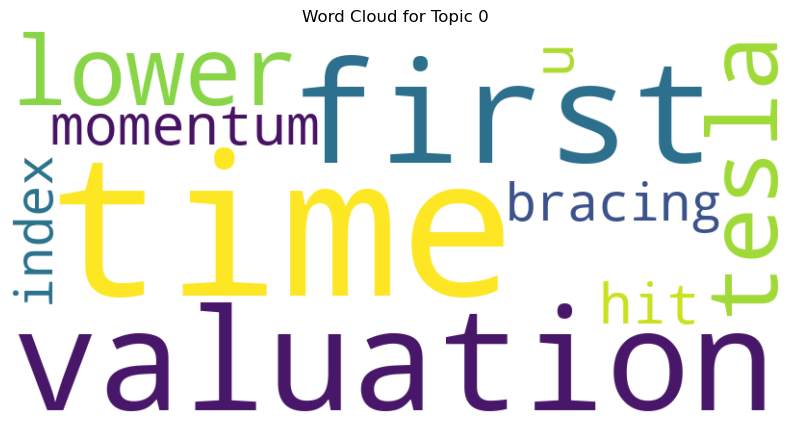

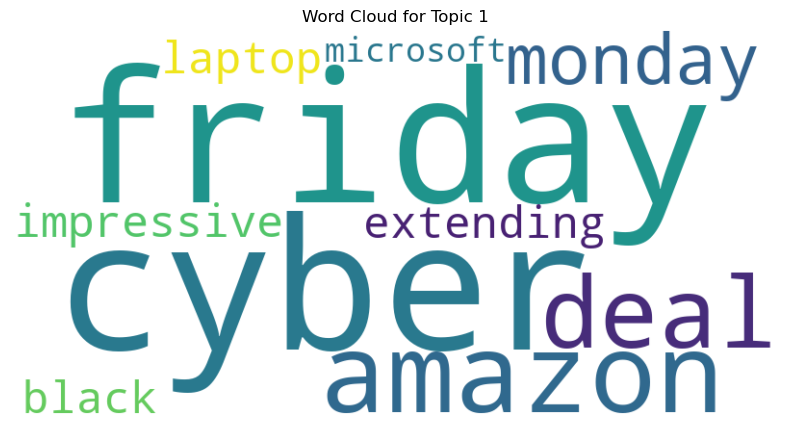

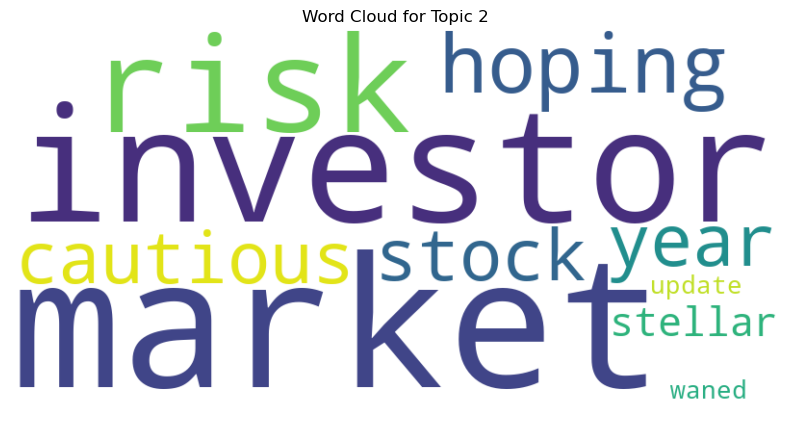

In [172]:
# Step 4.7: Generate word clouds for each topic
def generate_wordcloud(topic):
    word_freq = dict(lda_model.show_topic(topic, topn=10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic}")
    plt.show()

# Generate word clouds for all topics
for topic_idx in range(3):
    generate_wordcloud(topic_idx)


**Why Word Clouds?**  
Word clouds give a quick, visual overview of the key words in each topic. Larger words represent higher importance this makes it easier to understand and communicate the central themes without going into technical details.

This step bridges the gap between raw textual data and actionable insights by highlighting the main topics in an accessible way.

#### **Code Explanation**

1. **Input**:
   - The cleaned articles from Step 3.
2. **Processing**:
   - Tokenize the articles and prepare the data for LDA.
   - Run LDA to extract topics and their associated words.
3. **Output**:
   - A list of topics with their key words.
   - Word clouds for each topic.

# **5. Analyzing Sentiment and Topic Correlations**

### **Objectives**  
Analyze potential correlations between sentiment scores, identified topics, and Tesla's stock data. By doing this, we aim to uncover patterns and insights about how financial news impacts stock price movements.


### **Steps**  

1. **Merge Sentiment Scores and Topics with Stock Data**  
   - Combine the sentiment scores and identified topics with Tesla stock data and align by date for accurate analysis.

2. **Calculate Correlations**  
     - Use statistics to calculate correlations between:
     - Sentiment scores (positive, negative, neutral, compound) and stock prices (open, close, high, low).
     - Key topics and stock price movements.

3. **Visualize Insights**  
   - Create graphs and heatmaps to visualize relationships and patterns between sentiment, topics, and stock market behavior.

##### **Merging**

In [91]:
# Step 5.1: Merge sentiment and topic data with stock data
# Load the sentiment dataset (output of Step 3)
sentiment_data = pd.DataFrame({
    'Date': ['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-08'],
    'Positive': [0.368, 0.1865, 0.0, 0.0],
    'Negative': [0.066, 0.0965, 0.0, 0.155],
    'Neutral': [0.566, 0.7165, 1.0, 0.845],
    'Compound': [0.7506, 0.24975, 0.0, -0.296]
})

# Load stock data
stock_data = pd.DataFrame({
    'Date': ['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-08'],
    'Close': [248.42, 238.45, 237.93, 240.45],
    'Volume': [104654200, 121082600, 102629300, 85166600]
})

# Merge datasets on Date
merged_data = pd.merge(sentiment_data, stock_data, on='Date')
print("Merged Dataset:")
print(merged_data)


Merged Dataset:
         Date  Positive  Negative  Neutral  Compound   Close     Volume
0  2024-01-02    0.3680    0.0660   0.5660   0.75060  248.42  104654200
1  2024-01-03    0.1865    0.0965   0.7165   0.24975  238.45  121082600
2  2024-01-04    0.0000    0.0000   1.0000   0.00000  237.93  102629300
3  2024-01-08    0.0000    0.1550   0.8450  -0.29600  240.45   85166600


##### **Calculate Correlations**

##### Note: Filtering Numeric Data for Correlation

In this step, we filter the DataFrame `merged_data` to include only numeric columns (e.g., stock prices, sentiment scores) using the `.select_dtypes()` method. This makes sure we avoid errors during correlation calculations, as non-numeric data like text (e.g., article titles) or dates cannot be used in mathematical operations.

##### **Real-World Analogy** : Imagine a spreadsheet where some columns contain numbers (like stock prices) and others contain text (like article titles). If you're trying to find relationships (correlations), you would ignore the text and focus on the numbers. This code acts like a filter that separates the numbers from the rest, keeping our analysis smooth and error-free.


In [102]:
# Step 5.2: Calculate correlations between sentiment and stock data 
# Selecting only numeric columns for correlation calculation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix
correlations = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlations)


Correlation Matrix:
          Positive  Negative   Neutral  Compound     Close    Volume
Positive  1.000000 -0.050612 -0.937119  0.959988  0.809242  0.484849
Negative -0.050612  1.000000 -0.301131 -0.328046  0.062882 -0.362815
Neutral  -0.937119 -0.301131  1.000000 -0.801950 -0.793887 -0.337202
Compound  0.959988 -0.328046 -0.801950  1.000000  0.754220  0.551231
Close     0.809242  0.062882 -0.793887  0.754220  1.000000 -0.109088
Volume    0.484849 -0.362815 -0.337202  0.551231 -0.109088  1.000000


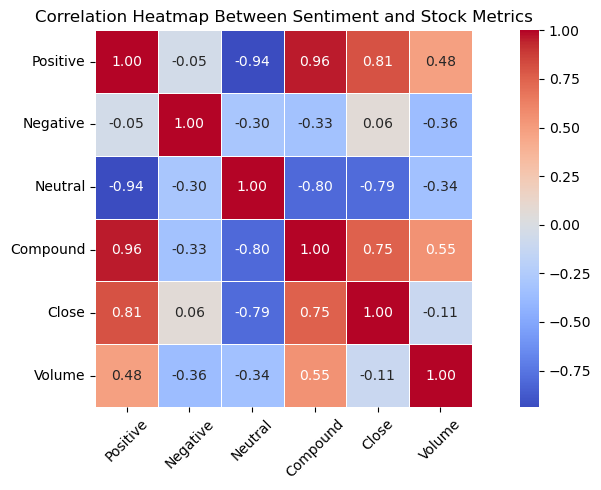

In [245]:
# Step 5.3: Visualising correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    correlations,
    annot=True,  # Show the correlation values
    fmt=".2f",  # Format the values
    cmap="coolwarm",  # Color scheme for better visualization
    cbar=True,  # Show the color bar
    square=True,  # Square-shaped cells
    linewidths=0.5,  # Add grid lines
)

# Customizing the plot
plt.title("Correlation Heatmap Between Sentiment and Stock Metrics")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()


##### **Heatmap Insights**  
Heatmap will illustrate how sentiment scores and topics correlate with stock price movements. These visuals will highlight trends, such as whether positive sentiment aligns with stock gains or specific topics drive significant price changes.

### **Code Explanation**  
- **Merging Data**: This makes sure that the sentiment and topic results are combined with stock data on a shared timeline, allowing for a meaningful analysis.  
- **Correlation Analysis**: By using Python, we calculate the statistical relationships between variables, providing a quantitative understanding of their interactions.  
- **Visualization**: Heatmaps and graphs provide a clear representation of the correlations, making complex relationships easier to interpret.


# **6. Dynamic Visualizations of Sentiment and Market Data**

#### **Objective**
- To create interactive and insightful visualizations that illustrate the relationship between sentiment scores and market movements.
- Help better comprehension of how news sentiment impacts stock price behavior.


### **Steps**

1. **Work with Visualization Libraries**:
   - Utilize `plotly`to create charts and visualizations.
2. **Prepare Data for Visualization**:
   - Make sure the dataset is clean and formatted appropriately for plotting.
3. **Generate Visualizations**:
   - Create line plots to track sentiment trends over time.
   - Visualize correlations using heatmaps.
   - Generate relevant visulizations to explore relationships between sentiment and market metrics.

### **Transforming and Summarizing Data**

#### **Overview of Sentiment and Stock Data**

#### **Objective:**
To provide a bird’s-eye view of the relationship between sentiment data and stock performance .

#### **What It Does:**
This visualization gives a summarized view of our dataset, showing important statistics like the mean, minimum, and maximum values for sentiment scores (`Positive`, `Negative`, `Neutral`, and `Compound`) as well as stock metrics (`Close` price and `Volume`). This helps us understand the overall distribution and range of values.


In [142]:
# Step 6.2: Creating summary statistics for sentiment and stock price
summary = merged_data.describe()  # Generate statistical summary of the dataset
print("Summary Statistics:")
print(summary)

Summary Statistics:
       Positive  Negative   Neutral  Compound       Close        Volume
count  4.000000  4.000000  4.000000  4.000000    4.000000  4.000000e+00
mean   0.138625  0.079375  0.781875  0.176088  241.312500  1.033832e+08
std    0.176388  0.064528  0.184787  0.443232    4.861264  1.468897e+07
min    0.000000  0.000000  0.566000 -0.296000  237.930000  8.516660e+07
25%    0.000000  0.049500  0.678875 -0.074000  238.320000  9.826362e+07
50%    0.093250  0.081250  0.780750  0.124875  239.450000  1.036418e+08
75%    0.231875  0.111125  0.883750  0.374962  242.442500  1.087613e+08
max    0.368000  0.155000  1.000000  0.750600  248.420000  1.210826e+08


#### **Overview of Time-Series**

#### **Objective:**
To explore trends in sentiment and stock price over time and see how they align.

#### **What It Does:**
This table shows how sentiment scores (`Compound`) and stock `Close` prices vary over time. It allows us to easily identify whether periods of positive sentiment correspond with stock price increases or decreases.

#### **Real-Life Example:**
Think of tracking investors mood each day (sentiment) alongside their investment habits (stock price). If you see that investments spikes on happy days, this table helps to highlight that pattern over time.


In [144]:
# Step 6.3: Preparing a time-series dataset for sentiment and stock prices
# This will make it easier to visualize trends
time_series_data = merged_data[['Date', 'Compound', 'Close']].copy()
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)
print("Time-Series Data:")
print(time_series_data.head())

Time-Series Data:
            Compound   Close
Date                        
2024-01-02   0.75060  248.42
2024-01-03   0.24975  238.45
2024-01-04   0.00000  237.93
2024-01-08  -0.29600  240.45


### **Creating Visualizations**

#### **Visualization 1: Sentiment vs. Stock Price Line Chart**

**What It Does:**  
This dual-line chart compares Tesla's stock price (close values) with the compound sentiment score over time. Each line represents one metric, allowing us to observe how sentiment aligns with or diverges from stock price trends.

**Context in Our Project:**  
The relationship between sentiment and stock price is at the heart of our analysis. By visualizing both metrics on the same chart, we can uncover potential patterns, such as spikes in sentiment preceding stock price movements. This insight is critical for understanding market dynamics and predicting future trends.


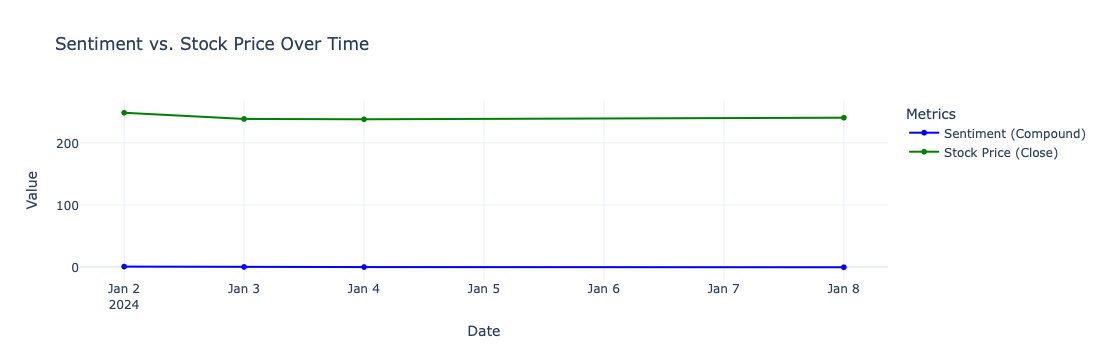

In [232]:

import plotly.graph_objects as go

# Creating a line chart
fig = go.Figure()

# Adding Compound sentiment scores as a line
fig.add_trace(go.Scatter(
    x=merged_data['Date'],
    y=merged_data['Compound'],
    mode='lines+markers',
    name='Sentiment (Compound)',
    line=dict(color='blue')
))

# Adding Close prices as a line
fig.add_trace(go.Scatter(
    x=merged_data['Date'],
    y=merged_data['Close'],
    mode='lines+markers',
    name='Stock Price (Close)',
    line=dict(color='green')
))

# Customizing layout
fig.update_layout(
    title="Sentiment vs. Stock Price Over Time",
    xaxis_title="Date",
    yaxis_title="Value",
    legend=dict(title="Metrics"),
    template="plotly_white"
)

# Display the figure
fig.show()


#### **Visulization 2 - Correlation Heatmap**

#### **Objective:**
To quantify and visualize the strength of relationships between different sentiment scores and stock metrics.

#### **What It Does:**
This heatmap highlights the correlations between all numeric variables. Strong positive correlations are highlighted, as are strong negative ones, allowing us to identify patterns, such as whether positive sentiment is closely tied to stock price increases.


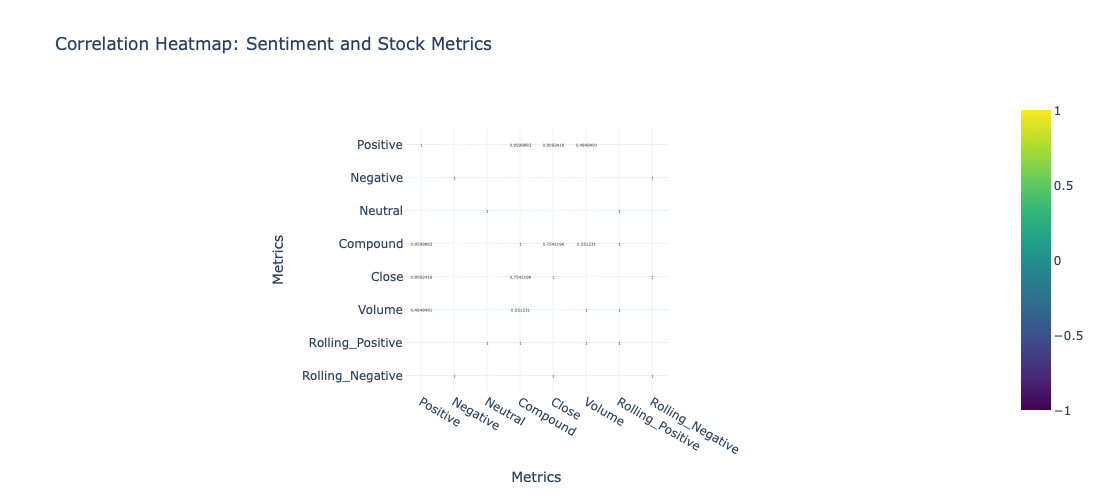

In [219]:

import plotly.express as px

# We Exclude non-numeric columns from the correlation matrix
numeric_data = merged_data.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix

# Generating correlation matrix heatmap 
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',
    title="Correlation Heatmap: Sentiment and Stock Metrics",
    width=500,  
    height=500 
)

# Customize the layout
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Metrics",
    template="plotly_white"
)

# Display the heatmap
fig.show()


#### **Visualization 3: Trading Volume Line Chart**

**What It Does:**  
This line chart visualizes the trading volume of Tesla stock over time, with markers on each data point to highlight specific trading days. The chart helps in identifying trends, spikes, or drops in trading activity across the given time period.

**Context in Our Project:**  
Tracking trading volume is crucial for understanding investor behavior and market dynamics. For example, a surge in trading volume could align with major news events or shifts in sentiment. This visualization allows us to correlate volume changes with sentiment and price movements, providing a comprehensive view of market responses.


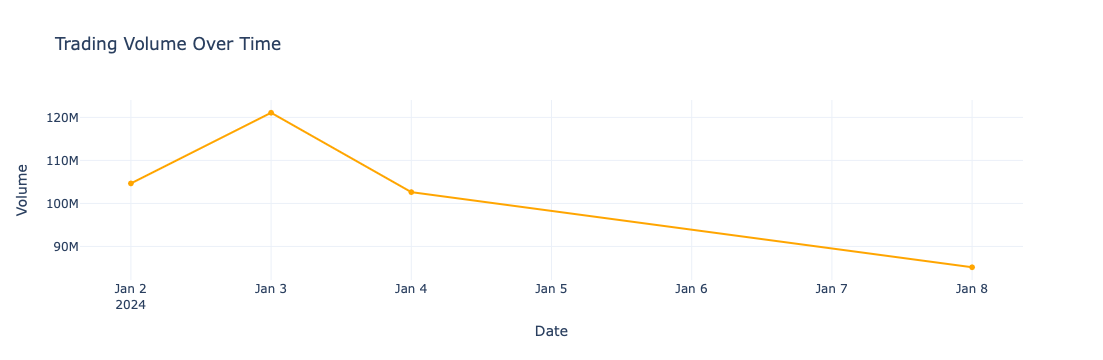

In [207]:
# Visulization 3 - Line chart for trading volume
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=merged_data['Date'],
    y=merged_data['Volume'],
    mode='lines+markers',
    name='Volume',
    line=dict(color='orange')
))

fig.update_layout(
    title="Trading Volume Over Time",
    xaxis_title="Date",
    yaxis_title="Volume",
    template="plotly_white"
)

# Display the figure
fig.show()


#### **Visualization 4: Summary Statistics Bar Chart**

**What It Does:**  
This bar chart presents the summary statistics (mean, standard deviation, min, max, etc.) for each metric—sentiment scores (Positive, Negative, Neutral, Compound), stock price (Close), and trading volume (Volume). Each statistic is grouped by the metric, allowing a comparative view across different data characteristics.

**Context in Our Project:**  
Understanding the statistical properties of sentiment and stock data helps in identifying patterns or outliers. For example, the standard deviation of sentiment scores can hint at the consistency of sentiment in financial news, while the maximum and minimum values of stock prices highlight market volatility. These insights aid in refining our analysis and providing a robust understanding of the data dynamics.


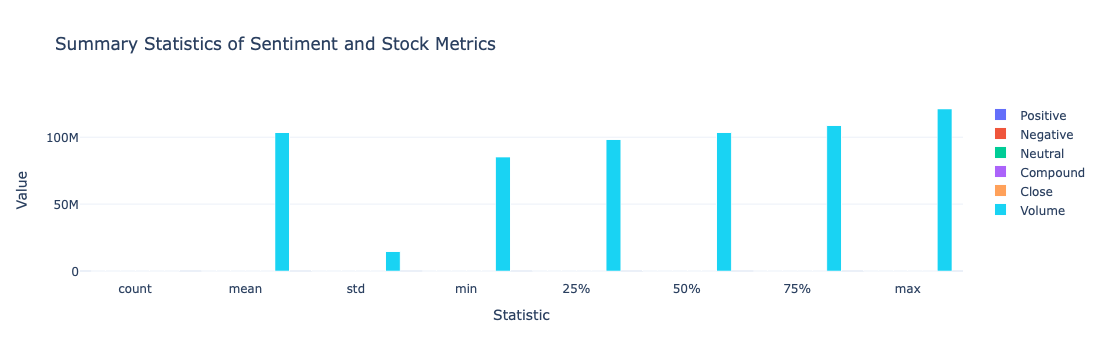

In [243]:


summary_stats = merged_data.describe()

fig = go.Figure()

# Adding bars for each summary statistic
for metric in ['Positive', 'Negative', 'Neutral', 'Compound', 'Close', 'Volume']:
    fig.add_trace(go.Bar(
        x=summary_stats.index,
        y=summary_stats[metric],
        name=metric
    ))

fig.update_layout(
    title="Summary Statistics of Sentiment and Stock Metrics",
    xaxis_title="Statistic",
    yaxis_title="Value",
    barmode="group",
    template="plotly_white"
)

# Display the figure
fig.show()
